### Edgar Moises Hernandez-Gonzalez
#### 19/11/19-21/04/20
#### Clasificacion de imagenes motoras en EEG con CNN-2D
##### Caracteristicas = RWE-DWT
##### 5 ejecuciones independientes

##### Sujeto 1
##### Accuracy = 57.64%
##### Kappa = 0.4352

In [0]:
from google.colab import drive

In [0]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import cohen_kappa_score, confusion_matrix
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
#from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [0]:
x_train = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RWE_DWT/MI-EEG-RWE-A01T.csv", header=None)
x_test = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RWE_DWT/MI-EEG-RWE-A01E.csv", header=None)
y_train = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RWE_DWT/EtiquetasA01T.csv", header=None)
y_test = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RWE_DWT/EtiquetasA01E.csv", header=None)

In [0]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(288, 66)
(288, 66)
(288, 1)
(288, 1)


In [0]:
n_samples_train = len(y_train)
n_samples_test = len(y_test) #en caso de no tener el y_test se puede utilizar el x_test

print("n_samples_train:", n_samples_train)
print("n_samples_test :", n_samples_test)

n_samples_train: 288
n_samples_test : 288


In [0]:
n_classes = len(np.unique(y_test)) #esto se podria calcular asi n_clases = len(np.unique(y)), la y puede ser train o test

print("n_classes:", n_classes)

n_classes: 4


In [0]:
#escalar los datos para que tengan media = 0 y desviacion estandar = 1
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [0]:
#codificar etiquetas con valores de 0 a nClases-1
le = LabelEncoder().fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
#convertir de 2D a 4D
x_train = x_train.reshape((n_samples_train, 22, 3, 1))
x_test = x_test.reshape((n_samples_test, 22, 3, 1))

print(x_train.shape)
print(x_test.shape)

(288, 22, 3, 1)
(288, 22, 3, 1)


In [0]:
#mc = ModelCheckpoint('/content/drive/My Drive/BCI-IV-2a/Modelos/Mejor_modelo_RWE01.hdf5',
#monitor='val_accuracy', save_best_only=True)

In [0]:
def CNN_2D():
  model = Sequential()
  model.add(Conv2D(32, (3,3), activation='relu', padding='same',
                   input_shape=x_train.shape[1:]))
  model.add(Flatten())
  model.add(Dense(16, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(n_classes, activation='softmax'))

  optimizer = Adam(lr=1e-4)
  model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
  return model

Iteration: 1
loss:  1.0199723574850295
accuracy:  0.5520833134651184
kappa:  0.4027777777777778
confusion matrix:
 [[38 25  4  5]
 [21 44  6  1]
 [10  2 39 21]
 [12  1 21 38]]


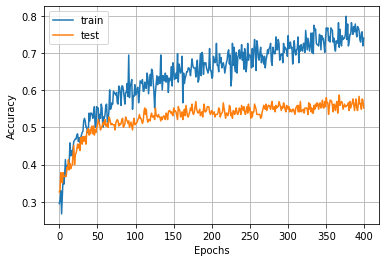

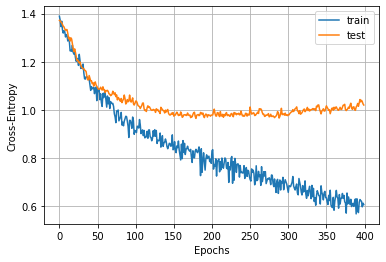

Iteration: 2
loss:  0.978177461359236
accuracy:  0.5590277910232544
kappa:  0.4120370370370371
confusion matrix:
 [[40 23  4  5]
 [22 43  6  1]
 [ 8  1 42 21]
 [12  1 23 36]]


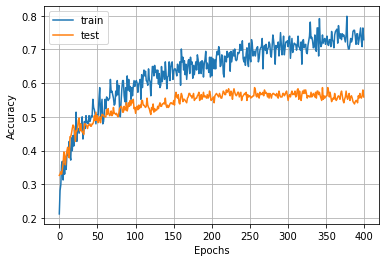

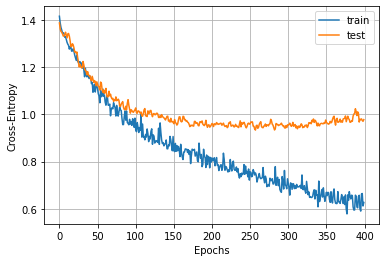

Iteration: 3
loss:  1.004194484816657
accuracy:  0.5416666865348816
kappa:  0.38888888888888884
confusion matrix:
 [[40 22  6  4]
 [22 44  5  1]
 [ 5  2 40 25]
 [10  1 29 32]]


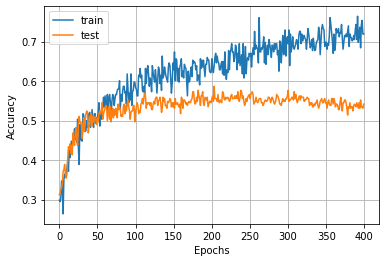

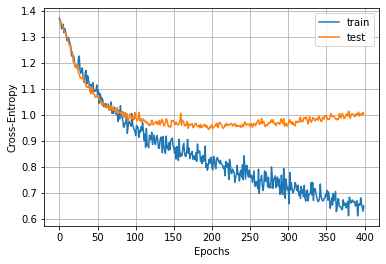

Iteration: 4
loss:  1.0224064389864604
accuracy:  0.53125
kappa:  0.375
confusion matrix:
 [[46 17  2  7]
 [25 41  5  1]
 [17  0 32 23]
 [15  2 21 34]]


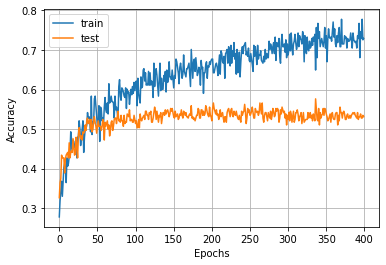

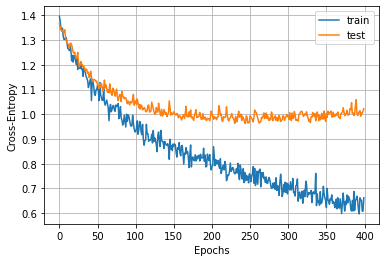

Iteration: 5
loss:  1.0365778009096782
accuracy:  0.5138888955116272
kappa:  0.35185185185185186
confusion matrix:
 [[31 30  5  6]
 [18 48  5  1]
 [10  3 30 29]
 [ 9  2 22 39]]


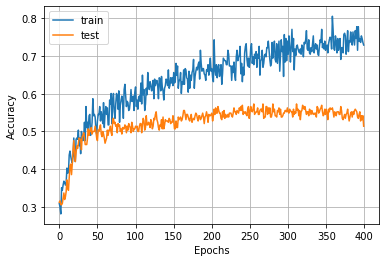

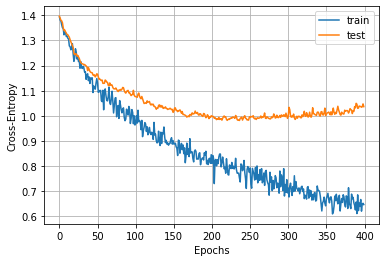


Resultados:
loss: [1.0199723574850295, 0.978177461359236, 1.004194484816657, 1.0224064389864604, 1.0365778009096782]
accuracy: [0.5520833134651184, 0.5590277910232544, 0.5416666865348816, 0.53125, 0.5138888955116272]
kappa: [0.4027777777777778, 0.4120370370370371, 0.38888888888888884, 0.375, 0.35185185185185186]


In [0]:
array_loss = []
array_acc = []
array_kappa = []
for i in range(5):
  print("Iteration:", i+1)
    
  model = CNN_2D()

  history = model.fit(x_train, y_train, epochs=400, batch_size=18,
                      validation_data=(x_test, y_test), verbose=0)
                      # callbacks=[mc]
    
  test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
  array_loss.append(test_loss)
  print("loss: ", test_loss)
  array_acc.append(test_acc)
  print("accuracy: ", test_acc)
    
  probabilidades = model.predict(x_test)
  y_pred = np.argmax(probabilidades, 1) #1=fila
    
  kappa = cohen_kappa_score(y_test, y_pred)
  array_kappa.append(kappa)
  print("kappa: ", kappa)
    
  matriz_confusion = confusion_matrix(y_test, y_pred)
  print("confusion matrix:\n", matriz_confusion)
    
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.grid()
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend(['train', 'test'])
  plt.show()
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.grid()
  plt.xlabel('Epochs')
  plt.ylabel('Cross-Entropy')
  plt.legend(['train', 'test'])
  plt.show()
    
print() 
print("Resultados:")
print("loss:", array_loss)
print("accuracy:", array_acc)
print("kappa:", array_kappa)

In [0]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 22, 3, 32)         320       
_________________________________________________________________
flatten_15 (Flatten)         (None, 2112)              0         
_________________________________________________________________
dense_29 (Dense)             (None, 16)                33808     
_________________________________________________________________
dropout_15 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_30 (Dense)             (None, 4)                 68        
Total params: 34,196
Trainable params: 34,196
Non-trainable params: 0
_________________________________________________________________


In [0]:
print("Mean Accuracy: %.4f" % np.mean(array_acc))
print("std: (+/- %.4f)" % np.std(array_acc))
print("Mean Kappa: %.4f" % np.mean(array_kappa))
print("std: (+/- %.4f)" % np.std(array_kappa))
print("Max Accuracy: %.4f" % np.max(array_acc))
print("Max Kappa: %.4f" % np.max(array_kappa))

Mean Accuracy: 0.5396
std: (+/- 0.0159)
Mean Kappa: 0.3861
std: (+/- 0.0212)
Max Accuracy: 0.5590
Max Kappa: 0.4120
